# Fundamentals of Machine Learning (CSCI-UA.473)

### Homework $4$
#### Due: November $30^{th}$, $2023$ at $11:59$ PM


#### Name: Chris Kong (zk2086)
#### Email: zk2086@nyu.edu

#### Discussed with: Zhiwen Zheng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Use the same dataset that was released with HW1
data = pd.read_csv('/content/drive/My Drive/COLAB/CS473/HW4/hw1_dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Create an imbalanced target variable
y= np.where(y > np.percentile(y, 50), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Question 1: Nearest Neighbor Classifier (15 points)

**Task 1.1 (10 points)** The k-NN algorithm is relatively simple and is based on the assumption that similar things exist in close proximity.

The steps for the k-NN algorithm are as follows:

- Choose the number of $k$ neighbors
- For each example in the test data, do the following:
  - Calculate the distance between the test data example and each example in the training data. You can use the Euclidean distance for this exercise.
  - Sort the distances in increasing order
  - Select the $k$ nearest training examples that are closest to the test example: corresponding to the first $k$ distances from this sorted list
  - Get the labels of the selected $k$ training examples
  - Return the mode of the $k$ labels
  - The prediction is the most common class among the $k$ nearest neighbors

**Task 1.2 (5 points):** Compare the test accuracy of KNN with $k=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]$. Plot the accuracy curve with the number of neighbors $k$ on the x-axis and the accuracy on the test set on the y-axis. How does changing this parameter affect the performance of the KNN?


In [ ]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X.values]
        return np.array(y_pred)

    def _predict(self, x):
        # Calculating the Euclidean distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train.values]

        # Sorting by distance and getting the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extracting the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Voting (most common label among nearest neighbors)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

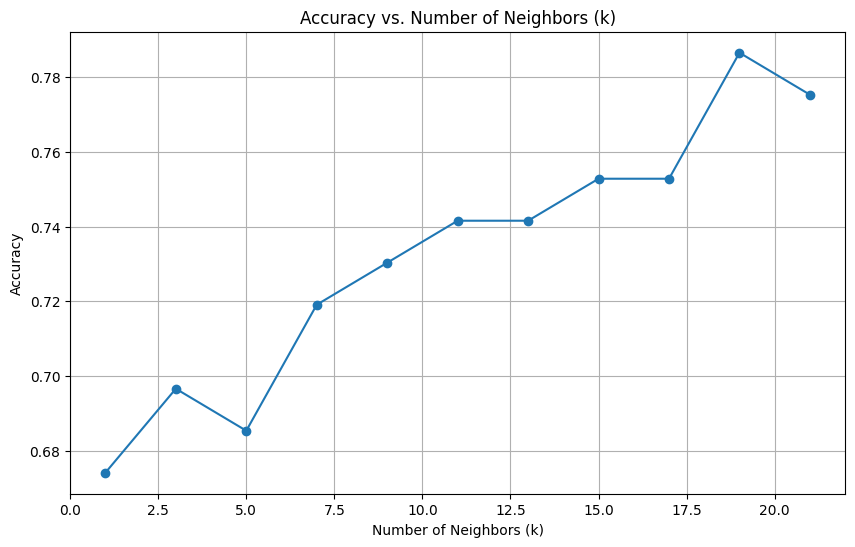

In [ ]:
import matplotlib.pyplot as plt

# List of k values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Initialize a list to store accuracy values
accuracy_values = []

# Test each value of k
for k in k_values:
    # Create an instance of the KNN class with the current k value
    knn = KNN(k=k)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # Append accuracy to the list
    accuracy_values.append(accuracy)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


### Question 2: Decision Trees (20 points)

**Task 2.1 (5 points):** Train a Decision tree classifier with grid search on maximum depth of the tree and number of features to consider when looking for the best spli. Evaluate its performance on the test set. You can use existing python libraries for this question.

**Task 2.2 (10 points):** Visualize the generated decision tree and answer the following questions:
- Identify and describe the decision-making process at the root node. What feature is used to make the first split by the classifier, and what is the threshold value?
- For any two leaf nodes, explain the path (in terms of decisions made) from the root to the leaf.

**Task 2.3 (5 points):**
- Train multiple Decision Tree classifiers with different values of max_depth ranging from 1 to 15 on the diabetes dataset.
- For each classifier, compute and plot the accuracy on both the training set and the test set.
- Create a plot that has max_depth on the x-axis and test accuracy on the y-axis. Analyze the plots to determine the max_depth at which the decision tree begins to overfit. What is it?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setting up the grid search parameters
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=0)

# Setting up Grid Search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

best_params, best_score, "Grid Search on Decision Tree completed."


({'max_depth': None, 'max_features': None},
 0.7027364185110663,
 'Grid Search on Decision Tree completed.')

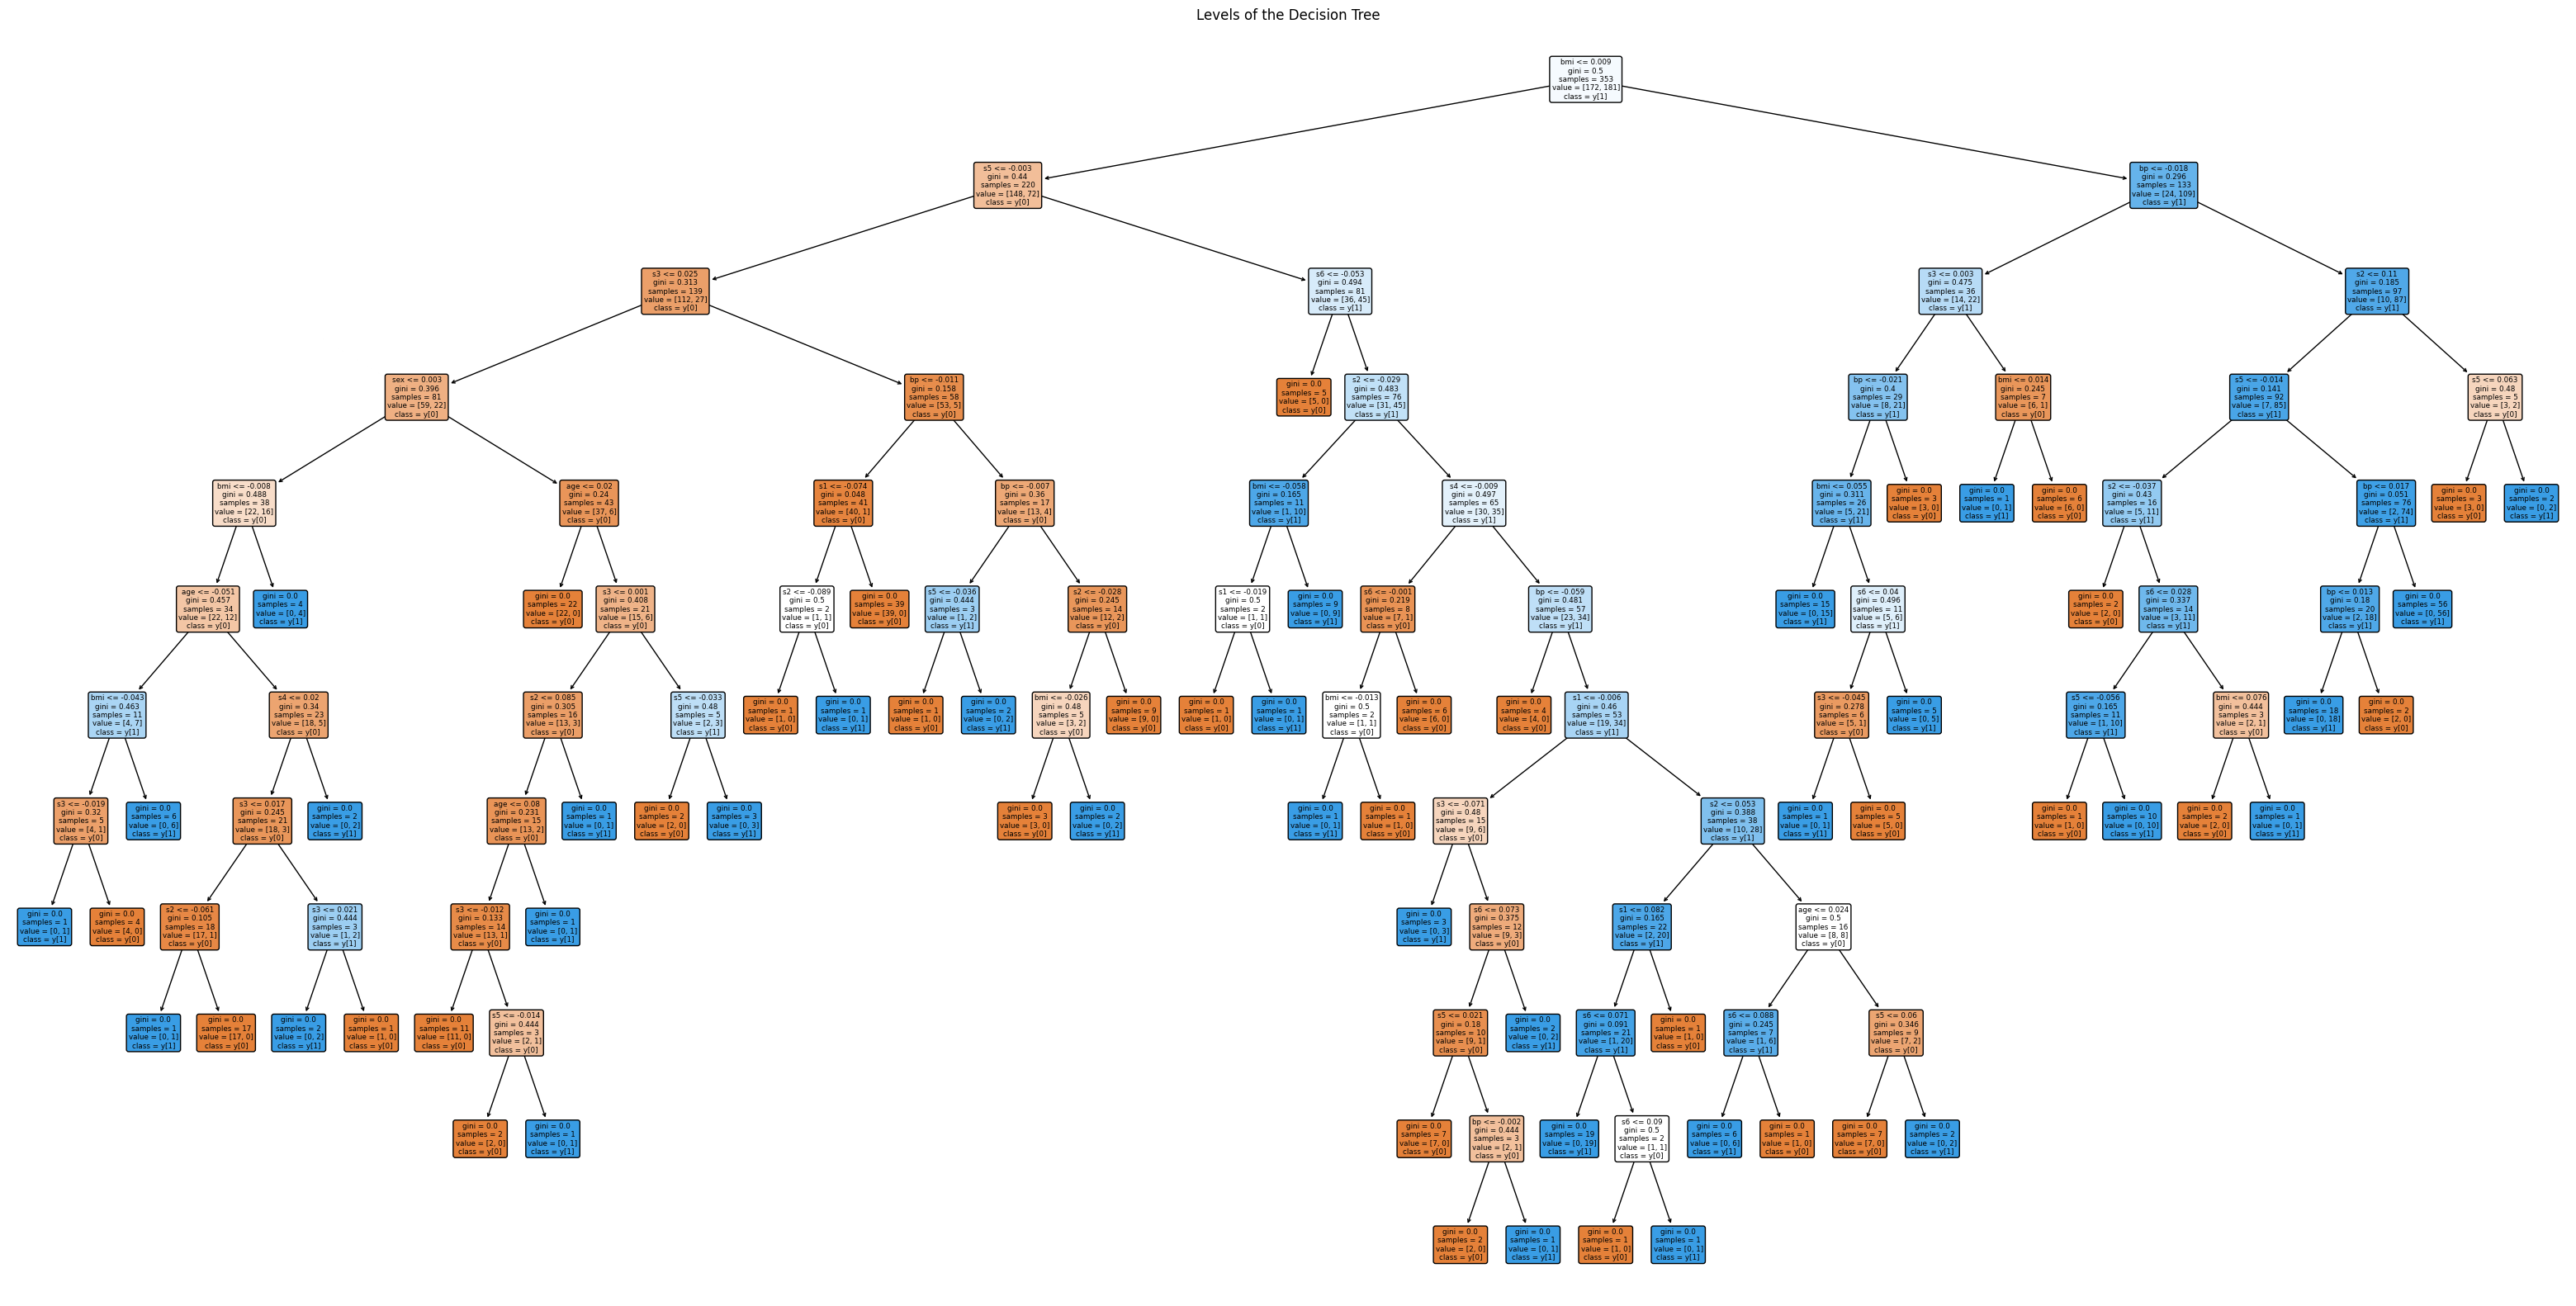

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming best_estimator is the best Decision Tree model from Task 2.1
best_estimator = grid_search.best_estimator_

# Visualize the top levels of the Decision Tree
plt.figure(figsize=(40, 20))
plot_tree(best_estimator, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Levels of the Decision Tree")
plt.show()



### Root Node Decision-Making:
- The root node uses the feature `bmi` for the first split with a threshold value of `0.009`. This means that the Decision Tree begins by separating the data into two groups: one where `bmi` is less than or equal to `0.009` and another where `bmi` is greater than `0.009`.

### Paths to Leaf Nodes:
1. **Path to Leaf Node 1 (node with `gini=0`, `samples=5`, `value = [5, 0]`, `class = y[0]`):**
   - At the root, it starts with `bmi <= 0.009`.
   - The next split is based on `s5 <= -0.003`.
   - Then it splits on `s6 <= -0.053`.
   - This path leads to a leaf node where the majority class is `y[0]`, which likely stands for one class in the target variable.

2. **Path to Leaf Node 2 (node with `gini=0`, `samples=2`, `value = [0, 2]`, `class = y[1]`):**
   - Begins with `bmi > 0.009`.
   - The next split is based on `bp > -0.018`.
   - Then it splits on `s2 > 0.11`.
   - Then it splits on `s5 > 0.063`.
   - Following this path leads to a leaf node where the majority class is `y[1]`.

Each node in the path details the decision made at that point, splitting the data into two groups based on the threshold of a specific feature. The color intensity in the nodes represents the class proportions, with lighter nodes indicating a mixture of classes and darker nodes indicating a majority of one class.



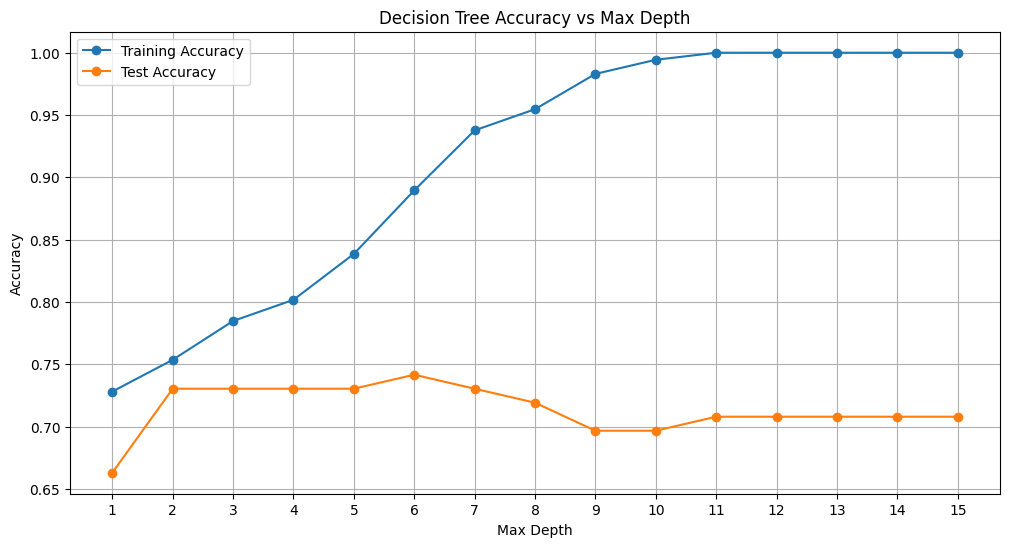

([0.7280453257790368,
  0.7535410764872521,
  0.7847025495750708,
  0.8016997167138811,
  0.8385269121813032,
  0.8895184135977338,
  0.9376770538243626,
  0.9546742209631728,
  0.9830028328611898,
  0.9943342776203966,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.6629213483146067,
  0.7303370786516854,
  0.7303370786516854,
  0.7303370786516854,
  0.7303370786516854,
  0.7415730337078652,
  0.7303370786516854,
  0.7191011235955056,
  0.6966292134831461,
  0.6966292134831461,
  0.7078651685393258,
  0.7078651685393258,
  0.7078651685393258,
  0.7078651685393258,
  0.7078651685393258],
 'Plot of Accuracy vs Max Depth for Decision Trees.')

In [9]:
# Task 2.3: Training Decision Trees with varying max_depth and evaluating performance
max_depth_range = range(1, 16)
train_accuracies = []
test_accuracies = []

for depth in max_depth_range:
    # Train a Decision Tree with the specified max_depth
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dtree.fit(X_train, y_train)

    # Evaluate on training set
    train_accuracy = dtree.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Evaluate on test set
    test_accuracy = dtree.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting max_depth against accuracy
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(max_depth_range)
plt.show()

(train_accuracies, test_accuracies, "Plot of Accuracy vs Max Depth for Decision Trees.")


The tree starts to overfit at the depth of 10 where the tree has training accuracy of 1 and constant testing accuracy.

## Question 3: Bagging and Boosting (30 points)

**Task 3.1 (15 points)** Implement bagging from scratch by completing the CustomBaggingClassifier Class.

**Task 3.2 (5 points)** Evaluate the performance of the bagged classifier on the test set. Compare its performance with a single decision tree. What is the difference between the performance of the two?

In [12]:
import numpy as np
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class CustomBaggingClassifier:
    def __init__(self, base_estimator=DecisionTreeClassifier(), n_estimators=10, bootstrap_size=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.bootstrap_size = bootstrap_size if bootstrap_size is not None else 1.0
        self.models = []

    def _bootstrap(self, X, y):
        # Calculate the number of samples to draw for the bootstrap sample
        n_samples = int(self.bootstrap_size * X.shape[0])
        # Generate random indices for the bootstrap sample
        indices = np.random.choice(range(X.shape[0]), size=n_samples, replace=True)
        # Return the bootstrap sample
        return X[indices], y[indices]

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Create a new bootstrap sample
            X_sample, y_sample = self._bootstrap(X, y)
            # Clone the base estimator and fit it to the bootstrap sample
            model = clone(self.base_estimator)
            model.fit(X_sample, y_sample)
            # Store the fitted model
            self.models.append(model)

    def predict(self, X):
        # Get predictions from each model
        predictions = np.array([model.predict(X) for model in self.models])
        # For each sample, calculate the most frequent prediction (majority voting)
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=predictions)
        return majority_votes

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
      return {
          'base_estimator': self.base_estimator,
          'n_estimators': self.n_estimators,
          'bootstrap_size': self.bootstrap_size
      }

    def set_params(self, **params):
      if 'base_estimator' in params:
          self.base_estimator = params['base_estimator']
      if 'n_estimators' in params:
          self.n_estimators = params['n_estimators']
      if 'bootstrap_size' in params:
          self.bootstrap_size = params['bootstrap_size']
      return self


In [17]:
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=UserWarning)

## Add code to evaluate the bagging classifier on the test set
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training a single decision tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Training the custom bagging classifier
bagging_classifier = CustomBaggingClassifier()
bagging_classifier.fit(X_train.values, y_train)
bagging_accuracy = bagging_classifier.score(X_test, y_test)

# Comparing the performances
print("Accuracy of Single Decision Tree:", dt_accuracy)
print("Accuracy of Custom Bagging Classifier:", bagging_accuracy)
print("Difference of Accuracies between Single Decision Tree and Custom Bagging Classifier:", dt_accuracy-bagging_accuracy)


Accuracy of Single Decision Tree: 0.6741573033707865
Accuracy of Custom Bagging Classifier: 0.6853932584269663
Difference of Accuracies between Single Decision Tree and Custom Bagging Classifier: -0.011235955056179803


**Task 3.3 (5 points):** Implement AdaBoost and Gradient Boosting with the base estimator as a decision tree with depth = 1. Compare the accuracy between these two models. You can use the pre-built functions from any Python library.  

**Task 3.4 (5 points):** Find the optimal number of models in bagging, AdaBoost, and Gradient Boosting and compare the accuracy between these three ensemble variants before and after the search.

In [19]:
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=UserWarning)

## Add code here
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# AdaBoost with a decision tree of depth 1
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
ada_clf.fit(X_train, y_train)
ada_predictions = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)

# Gradient Boosting with a decision tree of depth 1
gb_clf = GradientBoostingClassifier(max_depth=1, random_state=42)
gb_clf.fit(X_train.values, y_train)
gb_predictions = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Print the accuracies for comparison
print("Accuracy of AdaBoost Classifier:", ada_accuracy)
print("Accuracy of Gradient Boosting Classifier:", gb_accuracy)
print("Difference of Accuracies between AdaBoost and Gradient Boosting Classifier:", ada_accuracy-gb_accuracy)


Accuracy of AdaBoost Classifier: 0.6741573033707865
Accuracy of Gradient Boosting Classifier: 0.7303370786516854
Difference of Accuracies between AdaBoost and Gradient Boosting Classifier: -0.0561797752808989


In [ ]:
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn.model_selection import GridSearchCV

# Define the range of n_estimators
estimators_range = range(1, 101)  # for example, from 1 to 100

# Grid search for CustomBaggingClassifier (you might need to modify this part for your custom classifier)
param_grid_bagging = {'n_estimators': estimators_range}
grid_search_bagging = GridSearchCV(CustomBaggingClassifier(base_estimator=DecisionTreeClassifier()), param_grid_bagging, cv=5)
grid_search_bagging.fit(X_train.values, y_train)

# Grid search for AdaBoostClassifier
param_grid_adaboost = {'n_estimators': estimators_range}
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)), param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train.values, y_train)

# Grid search for GradientBoostingClassifier
param_grid_gb = {'n_estimators': estimators_range}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(max_depth=1), param_grid_gb, cv=5)
grid_search_gb.fit(X_train.values, y_train)

# Get the best number of estimators
best_n_estimators_bagging = grid_search_bagging.best_params_['n_estimators']
best_n_estimators_adaboost = grid_search_adaboost.best_params_['n_estimators']
best_n_estimators_gb = grid_search_gb.best_params_['n_estimators']

# Compare accuracies
print("Optimal number of estimators for Bagging:", best_n_estimators_bagging)
print("Optimal number of estimators for AdaBoost:", best_n_estimators_adaboost)
print("Optimal number of estimators for Gradient Boosting:", best_n_estimators_gb)


Optimal number of estimators for Bagging: 21
Optimal number of estimators for AdaBoost: 14
Optimal number of estimators for Gradient Boosting: 29


### Question 4: Random Forest Classifier (18 points)

**Task 4.1 (3 points):** Construct the random forest classifier with a set of hyper-parameters of your choice. Evaluate its performance on the test set. You can use existing python libraries for this question.

**Task 4.2 (5 points):** Compare the accuracy of random forest with the decision tree classifier. Which one obtains better performance and why?

**Task 4.3 (5 points):** Vary the number of trees in the Random Forest to $[10, 50, 100, 200]$. What effect does changing this parameter have on training and test accuracy?

**Task 4.4 (5 points):** Use cross-validation to find an optimal set of hyperparameters for the Random Forest.

In [ ]:
## Add code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Constructing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42) # Example hyper-parameters
rf_classifier.fit(X_train, y_train)

# Evaluating the Random Forest Classifier
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy of Random Forest Classifier:", rf_accuracy)


Accuracy of Random Forest Classifier: 0.7191011235955056


Decision Tree and Random Forest classifier yield similar accuracies. It could indicate that the dataset has simple decision boundaries, which a single decision tree can effectively capture without the need for more complex ensemble methods. This similarity in performance might also stem from both models either overfitting or underfitting the data to a similar degree. Additionally, the configuration and tuning of the Random Forest, particularly if not optimal, could result in it not fully leveraging its ensemble advantage over a single decision tree.

In [ ]:
n_estimators_values = [10, 50, 100, 200]
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_accuracy = rf.score(X_train, y_train)
    test_accuracy = rf.score(X_test, y_test)
    print(f"n_estimators: {n}, Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")


n_estimators: 10, Train accuracy: 0.9830028328611898, Test accuracy: 0.7191011235955056
n_estimators: 50, Train accuracy: 1.0, Test accuracy: 0.7415730337078652
n_estimators: 100, Train accuracy: 1.0, Test accuracy: 0.7191011235955056
n_estimators: 200, Train accuracy: 1.0, Test accuracy: 0.7415730337078652


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


### Question 5: Histogram and Kernel Density Estimation (17 points)

**Task 5.1 (5 points):** For the BMI feature, plot a histogram with the density estimation with 30 equal width bins and answer the following questions:
- What does the height of a bin in the histogram represent?
- How do outliers affect the histogram shape?

**Task 5.2 (5 points):** Now use different number of bins (e.g., 5, 10, 30, 60, 100) and discuss the differences.

**Task 5.3 (5 points):** Implement Kernel Density Estimation with Gaussian kernels for the BMI feature. Compare the results with the histogram density estimation. Plot your learned density function.

**Task 5.4 (2 points):** How might a doctor use KDE to understand the distribution of a particular health metric (like blood glucose levels) across a population?

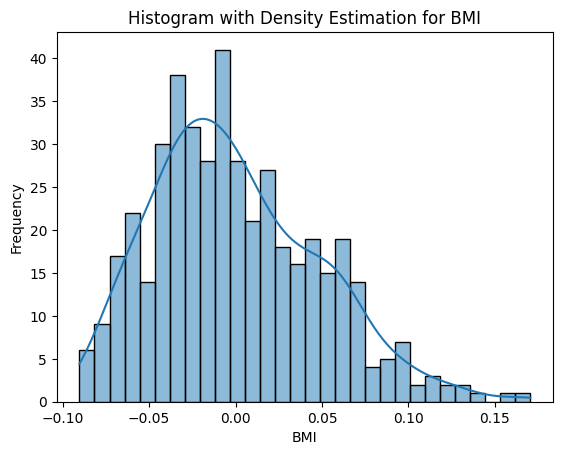

In [ ]:
## Add code here
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'bmi' is a column in your dataset
sns.histplot(data=data['bmi'], bins=30, kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram with Density Estimation for BMI')
plt.show()

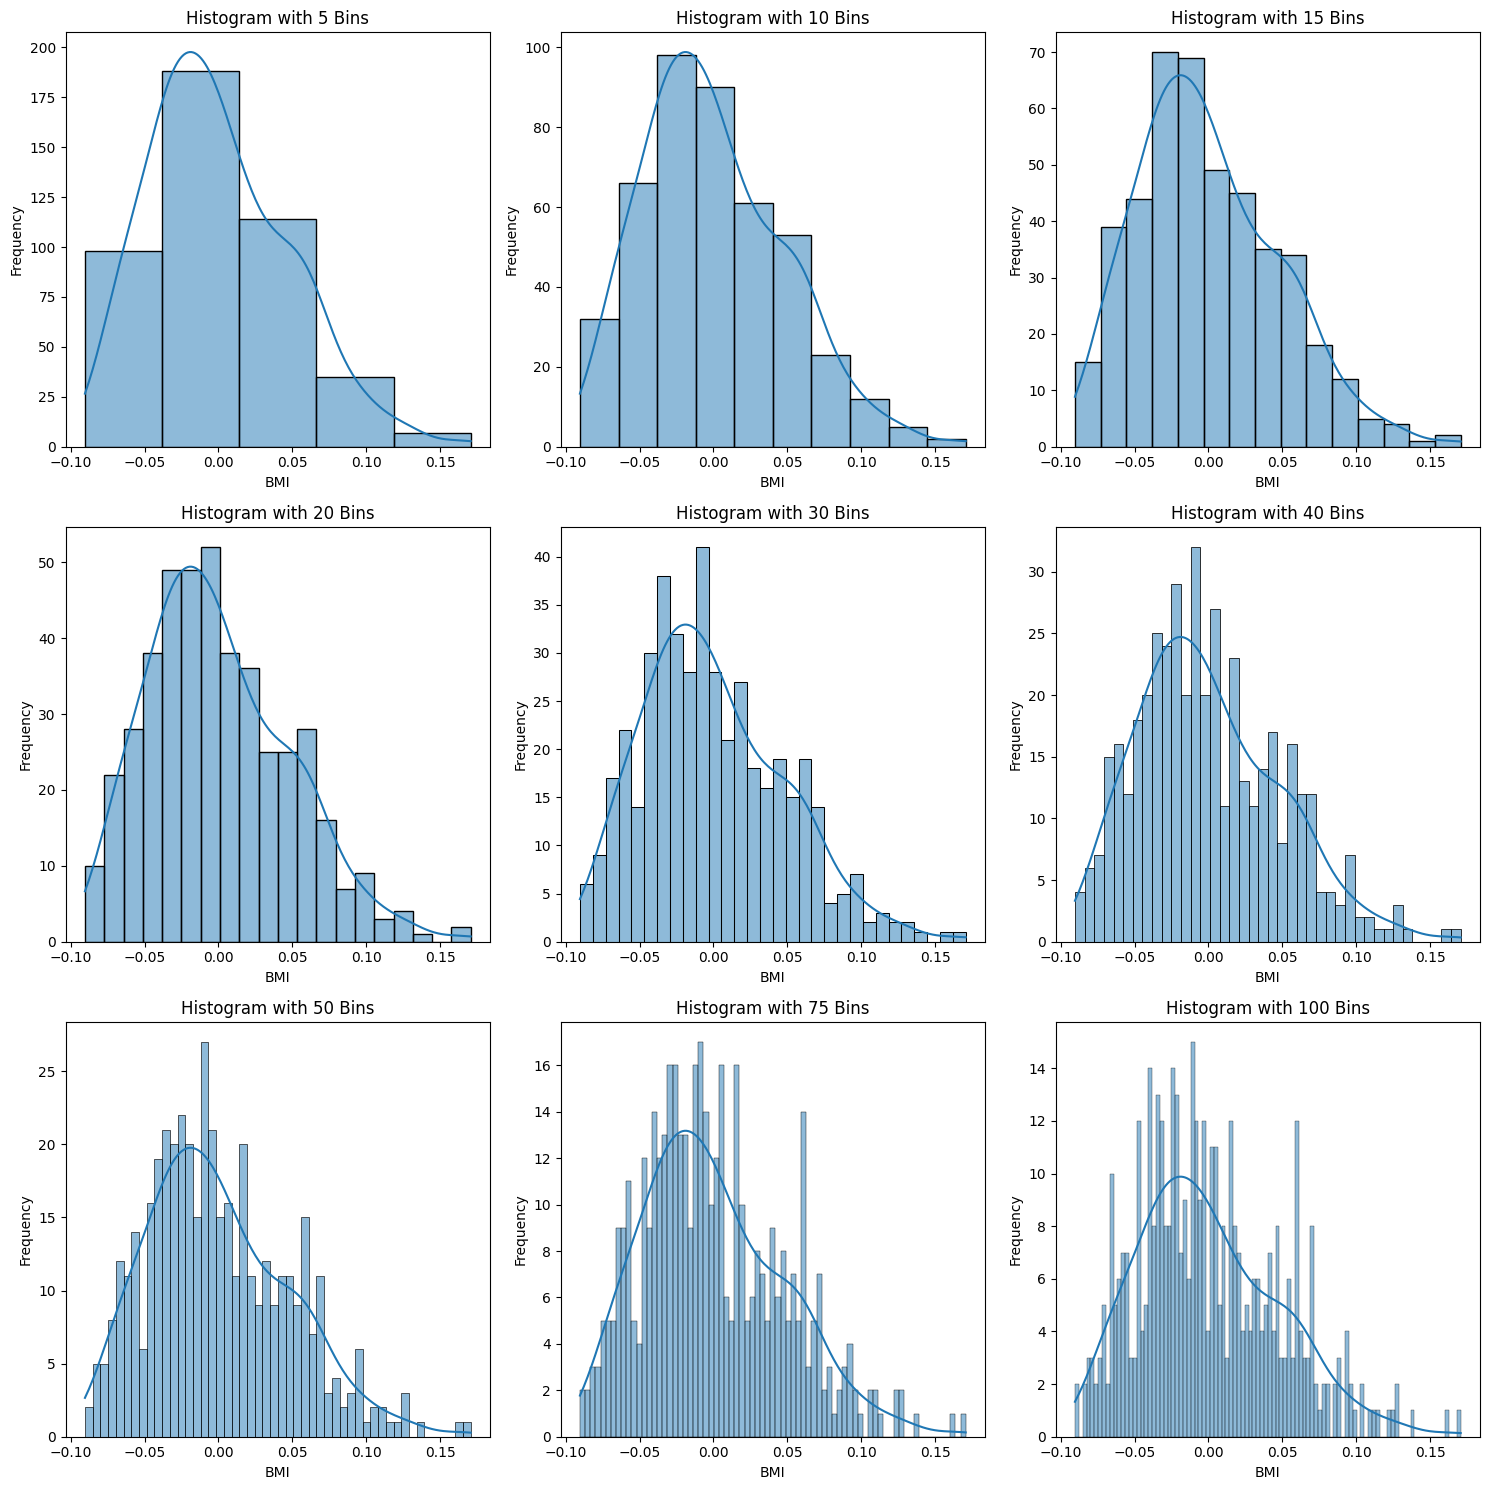

In [ ]:
# Assuming 'bmi' is a column in your dataset
bmi_data = data['bmi']

# Define different numbers of bins
bins_values = [5, 10, 15, 20, 30, 40, 50, 75, 100]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, bins in enumerate(bins_values):
    ax = axes[i // 3, i % 3]
    sns.histplot(bmi_data, bins=bins, kde=True, ax=ax)
    ax.set_title(f'Histogram with {bins} Bins')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can observe how changing the number of bins affects the granularity and appearance of the histogram. Fewer bins result in a more generalized view of the distribution, potentially masking finer details, while a higher number of bins provides a more detailed view but can sometimes introduce noise or overfit to specific data points.

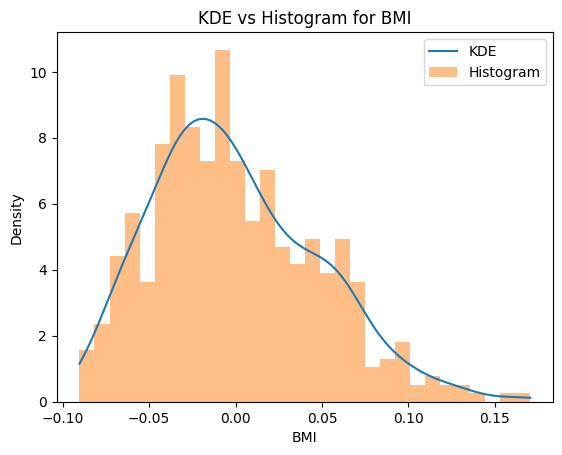

In [ ]:
from scipy.stats import gaussian_kde

# KDE with Gaussian kernel
bmi_data = data['bmi']
kde = gaussian_kde(bmi_data)

# Plotting
x_range = np.linspace(bmi_data.min(), bmi_data.max(), 1000)
plt.plot(x_range, kde(x_range), label='KDE')
plt.hist(bmi_data, bins=30, density=True, alpha=0.5, label='Histogram')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('KDE vs Histogram for BMI')
plt.legend()
plt.show()


A doctor can use KDE to understand the distribution of a health metric like blood glucose levels across a population. KDE provides a smooth estimate of the probability density function, revealing the most common values, the range of variation, and the presence of multiple modes if any. This understanding can aid in identifying normal, at-risk, and abnormal ranges, inform screening strategies, and tailor medical advice or interventions based on the population's health profile.